In [1]:
import numpy as np
import os
import glob
import sys
import torch
from pathlib import Path

current_dir = os.path.dirname(os.path.abspath('__file__'))
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(parent_dir)
grandparent_dir = os.path.abspath(os.path.join(parent_dir, '..'))
sys.path.append(grandparent_dir)
print(grandparent_dir)

import gendata
import learner as ln
from utils import Logger, read_config_file, set_random_seed, tensors_to_numpy

/home/lbu/project/PINN_DE


In [2]:
from configs.config_plot import *

seed = 0
set_random_seed(seed)

os.makedirs(output_dir, exist_ok=True)  

# Logger
logger = Logger(output_dir)
logger.info("#" * 100)

2023-09-15 10:20:49 INFO ####################################################################################################


In [3]:
# Dasetset  --------------------------------------------------------------------
config_file_path = "/home/lbu/project/PINN_DE/configs/train/dp/config_pinn.py"
config = read_config_file(config_file_path)
config.dataset_path = "/home/lbu/project/PINN_DE/outputs/data/DynamicDoublePendulumDAE"
config.load_net_path = "/home/lbu/project/PINN_DE/outputs/task_doublependlum_pinn/train-model.pkl"

data_args = {
    "config": config,
    "logger": logger,
}
data = ln.data.get_data(**data_args)
train_loader, val_loader = data
y0, y, yt, data_t, physics_t = next(iter(val_loader))

# Net --------------------------------------------------------------------
net_args = {
    "config": config,
    "logger": logger,
}
net = ln.nn.get_model(**net_args)
dyn_system = net.right_term_net.calculator
q_hat, qt_hat, qtt_hat = net.get_q_qt_qtt(data_t)

# to numpy --------------------------------------------------------------------
data_t, y, yt = tensors_to_numpy(data_t, y, yt)
q_hat, qt_hat, qtt_hat = tensors_to_numpy(q_hat, qt_hat, qtt_hat)

# data processing --------------------------------------------------------------------
q, qt = np.split(y, 2, axis=-1)
qt, qtt = np.split(yt, 2, axis=-1)
all_states = np.concatenate([q, qt, qtt], axis=-1)
energy_rk4 = dyn_system.energy(q, qt)

# net processing --------------------------------------------------------------------
y_hat = np.concatenate([q_hat, qt_hat], axis=-1)
all_states_hat = np.concatenate([q_hat, qt_hat, qtt_hat], axis=-1)

phi = dyn_system.phi(q_hat, qt_hat, qtt_hat)
phi_t = dyn_system.phi_t(q_hat, qt_hat, qtt_hat)
phi_tt = dyn_system.phi_tt(q_hat, qt_hat, qtt_hat)
energy_deeponet = dyn_system.energy(q_hat, qt_hat)
kinetic = dyn_system.kinetic(q_hat, qt_hat)
potential = dyn_system.potential(q_hat, qt_hat)

2023-09-15 10:20:49 INFO =================>
2023-09-15 10:20:49 INFO Start get dataset...
2023-09-15 10:20:49 INFO Loading dataset from path: /home/lbu/project/PINN_DE/outputs/data/DynamicDoublePendulumDAE
2023-09-15 10:20:49 INFO DynamicData is loaded
2023-09-15 10:20:50 INFO =================>
2023-09-15 10:20:50 INFO Start get models...
2023-09-15 10:20:50 INFO PINN loaded
2023-09-15 10:20:50 INFO Number of parameters in model: 1380
2023-09-15 10:20:50 INFO Network loaded from '/home/lbu/project/PINN_DE/outputs/task_doublependlum_pinn/train-model.pkl'


Successfully loaded pretrained weights from "/home/lbu/project/PINN_DE/outputs/task_doublependlum_pinn/train-model.pkl"


In [4]:
# Dasetset  --------------------------------------------------------------------
config_file_path = "/home/lbu/project/PINN_DE/configs/train/dp/config_pinn_phi.py"
config = read_config_file(config_file_path)
config.dataset_path = "/home/lbu/project/PINN_DE/outputs/data/DynamicDoublePendulumDAE"
config.load_net_path = "/home/lbu/project/PINN_DE/outputs/task_doublependlum_pinn_phi/train-model.pkl"

data_args = {
    "config": config,
    "logger": logger,
}
data = ln.data.get_data(**data_args)
train_loader, val_loader = data
y0, y, yt, data_t, physics_t = next(iter(val_loader))

# Net --------------------------------------------------------------------
net_args = {
    "config": config,
    "logger": logger,
}
net = ln.nn.get_model(**net_args)
dyn_system = net.right_term_net.calculator
q_hat, qt_hat, qtt_hat = net.get_q_qt_qtt(data_t)

# to numpy --------------------------------------------------------------------
data_t, y, yt = tensors_to_numpy(data_t, y, yt)
q_hat, qt_hat, qtt_hat = tensors_to_numpy(q_hat, qt_hat, qtt_hat)

# data processing --------------------------------------------------------------------
q, qt = np.split(y, 2, axis=-1)
qt, qtt = np.split(yt, 2, axis=-1)
all_states = np.concatenate([q, qt, qtt], axis=-1)
energy_rk4 = dyn_system.energy(q, qt)

# net processing --------------------------------------------------------------------
y_hat = np.concatenate([q_hat, qt_hat], axis=-1)
all_states_hat = np.concatenate([q_hat, qt_hat, qtt_hat], axis=-1)

phi = dyn_system.phi(q_hat, qt_hat, qtt_hat)
phi_t = dyn_system.phi_t(q_hat, qt_hat, qtt_hat)
phi_tt = dyn_system.phi_tt(q_hat, qt_hat, qtt_hat)
energy_pinn = dyn_system.energy(q_hat, qt_hat)
kinetic = dyn_system.kinetic(q_hat, qt_hat)
potential = dyn_system.potential(q_hat, qt_hat)

2023-09-15 10:20:50 INFO =================>
2023-09-15 10:20:50 INFO Start get dataset...
2023-09-15 10:20:50 INFO Loading dataset from path: /home/lbu/project/PINN_DE/outputs/data/DynamicDoublePendulumDAE
2023-09-15 10:20:50 INFO DynamicData is loaded
2023-09-15 10:20:50 INFO =================>
2023-09-15 10:20:50 INFO Start get models...
2023-09-15 10:20:50 INFO PINN_phi loaded
2023-09-15 10:20:50 INFO Number of parameters in model: 1380
2023-09-15 10:20:50 INFO Network loaded from '/home/lbu/project/PINN_DE/outputs/task_doublependlum_pinn_phi/train-model.pkl'


Successfully loaded pretrained weights from "/home/lbu/project/PINN_DE/outputs/task_doublependlum_pinn_phi/train-model.pkl"


In [5]:
# Dasetset  --------------------------------------------------------------------
config_file_path = "/home/lbu/project/PINN_DE/configs/train/dp/config_baseline.py"
config = read_config_file(config_file_path)
config.dataset_path = "/home/lbu/project/PINN_DE/outputs/data/DynamicDoublePendulumDAE"
config.load_net_path = "/home/lbu/project/PINN_DE/outputs/task_doublepenlum_baseline/train-model.pkl"

data_args = {
    "config": config,
    "logger": logger,
}
data = ln.data.get_data(**data_args)
train_loader, val_loader = data
y0, y, yt, data_t, physics_t = next(iter(val_loader))

# Net --------------------------------------------------------------------
net_args = {
    "config": config,
    "logger": logger,
}
net = ln.nn.get_model(**net_args)
dyn_system = net.right_term_net.calculator
q_hat, qt_hat, qtt_hat = net.get_q_qt_qtt(data_t)

# to numpy --------------------------------------------------------------------
data_t, y, yt = tensors_to_numpy(data_t, y, yt)
q_hat, qt_hat, qtt_hat = tensors_to_numpy(q_hat, qt_hat, qtt_hat)

# data processing --------------------------------------------------------------------
q, qt = np.split(y, 2, axis=-1)
qt, qtt = np.split(yt, 2, axis=-1)
all_states = np.concatenate([q, qt, qtt], axis=-1)
energy_rk4 = dyn_system.energy(q, qt)

# net processing --------------------------------------------------------------------
y_hat = np.concatenate([q_hat, qt_hat], axis=-1)
all_states_hat = np.concatenate([q_hat, qt_hat, qtt_hat], axis=-1)

phi = dyn_system.phi(q_hat, qt_hat, qtt_hat)
phi_t = dyn_system.phi_t(q_hat, qt_hat, qtt_hat)
phi_tt = dyn_system.phi_tt(q_hat, qt_hat, qtt_hat)
energy_baseline = dyn_system.energy(q_hat, qt_hat)
kinetic = dyn_system.kinetic(q_hat, qt_hat)
potential = dyn_system.potential(q_hat, qt_hat)

2023-09-15 10:20:50 INFO =================>
2023-09-15 10:20:50 INFO Start get dataset...
2023-09-15 10:20:50 INFO Loading dataset from path: /home/lbu/project/PINN_DE/outputs/data/DynamicDoublePendulumDAE
2023-09-15 10:20:50 INFO DynamicData is loaded
2023-09-15 10:20:50 INFO =================>
2023-09-15 10:20:50 INFO Start get models...
2023-09-15 10:20:50 INFO Baseline loaded
2023-09-15 10:20:50 INFO Number of parameters in model: 1540


Successfully loaded pretrained weights from "/home/lbu/project/PINN_DE/outputs/task_doublepenlum_baseline/train-model.pkl"


2023-09-15 10:20:50 INFO Network loaded from '/home/lbu/project/PINN_DE/outputs/task_doublepenlum_baseline/train-model.pkl'


In [6]:
# Dasetset  --------------------------------------------------------------------
config_file_path = "/home/lbu/project/pinndae/configs/train/dp/config_pinn_dp.py"
config = read_config_file(config_file_path)
# config.dataset_path = "/home/lbu/project/PINN_DE/outputs/data/DynamicDoublePendulumDAE"
config.dataset_path = "/home/lbu/project/PINN_DE/outputs/data/DynamicDoublePendulumDAE_rk01"

data_args = {
    "config": config,
    "logger": logger,
}
data = ln.data.get_data(**data_args)
train_loader, val_loader = data
y0, y, yt, data_t01, physics_t = next(iter(val_loader))

# to numpy --------------------------------------------------------------------
data_t01, y, yt = tensors_to_numpy(data_t01, y, yt)

# data processing --------------------------------------------------------------------
q, qt = np.split(y, 2, axis=-1)
qt, qtt = np.split(yt, 2, axis=-1)
all_states = np.concatenate([q, qt, qtt], axis=-1)
energy_rk4_h01 = dyn_system.energy(q, qt)


2023-09-15 10:20:50 INFO =================>
2023-09-15 10:20:50 INFO Start get dataset...
2023-09-15 10:20:50 INFO Loading dataset from path: /home/lbu/project/PINN_DE/outputs/data/DynamicDoublePendulumDAE_rk01
2023-09-15 10:20:50 INFO DynamicData is loaded


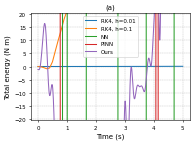

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(4 * 1, 3 * 1), dpi=DPI)

subfig = axs
subfig.set_title('(a)')
plt.xlabel('Time (s)')
plt.ylabel('Total energy (N m)')
subfig.plot(data_t, energy_rk4, '-', label='RK4, h=0.01')
subfig.plot(data_t01, energy_rk4_h01, '-', label='RK4, h=0.1')
subfig.plot(data_t, energy_baseline, '-', label='NN')
subfig.plot(data_t, energy_pinn, '-', label='PINN')
subfig.plot(data_t, energy_deeponet, '-', label='Ours')
subfig.legend()

plt.ylim((-20.2, 20.2))
plt.tight_layout()


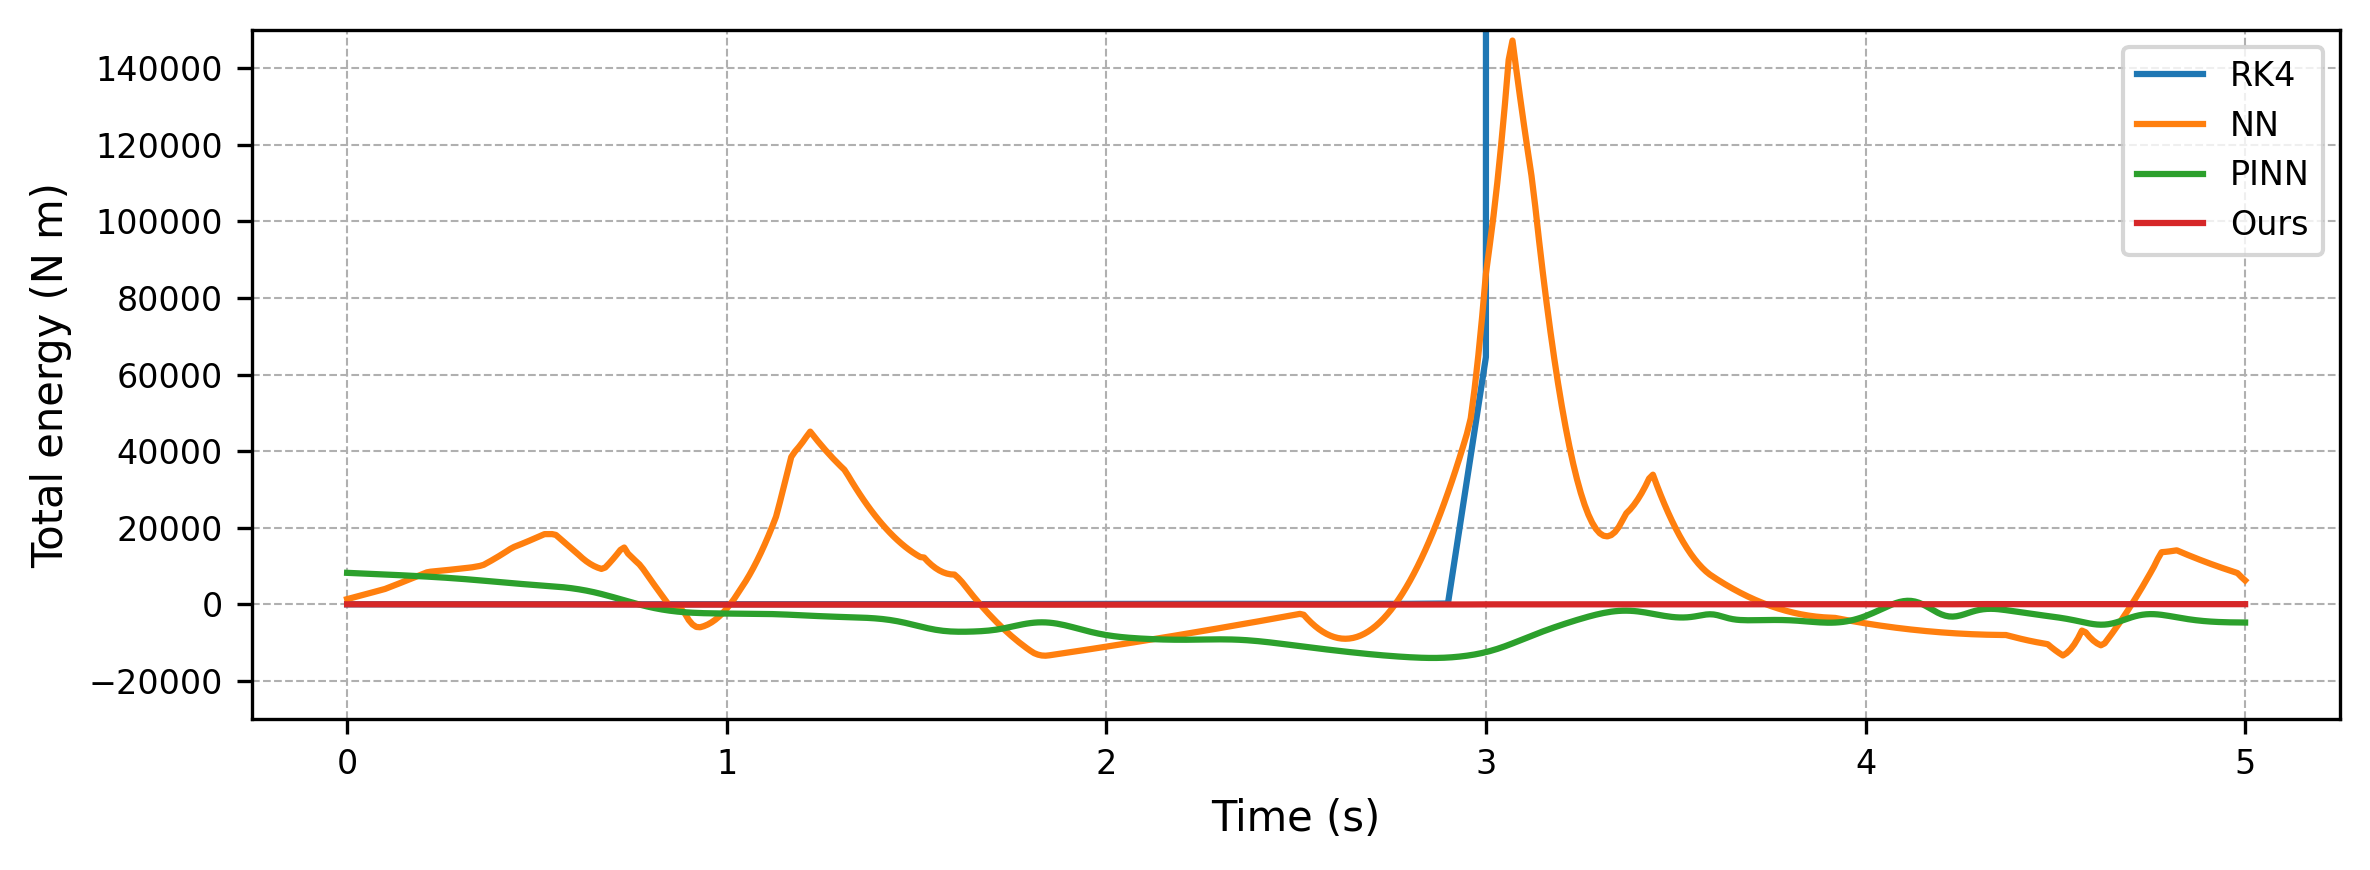

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(8 * 1, 3 * 1), dpi=Latex_DPI)

subfig = axs
# subfig.set_title('(a)')
plt.xlabel('Time (s)')
plt.ylabel('Total energy (N m)')
# subfig.plot(data_t, energy_rk4, '-', label='RK4')
subfig.plot(data_t01, energy_rk4_h01, '-', label='RK4')
subfig.plot(data_t, energy_baseline, '-', label='NN')
subfig.plot(data_t, energy_pinn, '-', label='PINN')
subfig.plot(data_t, energy_deeponet, '-', label='Ours')
subfig.legend()

jie = 2e5
plt.ylim((-3e4, 1.5e5))
plt.tight_layout()


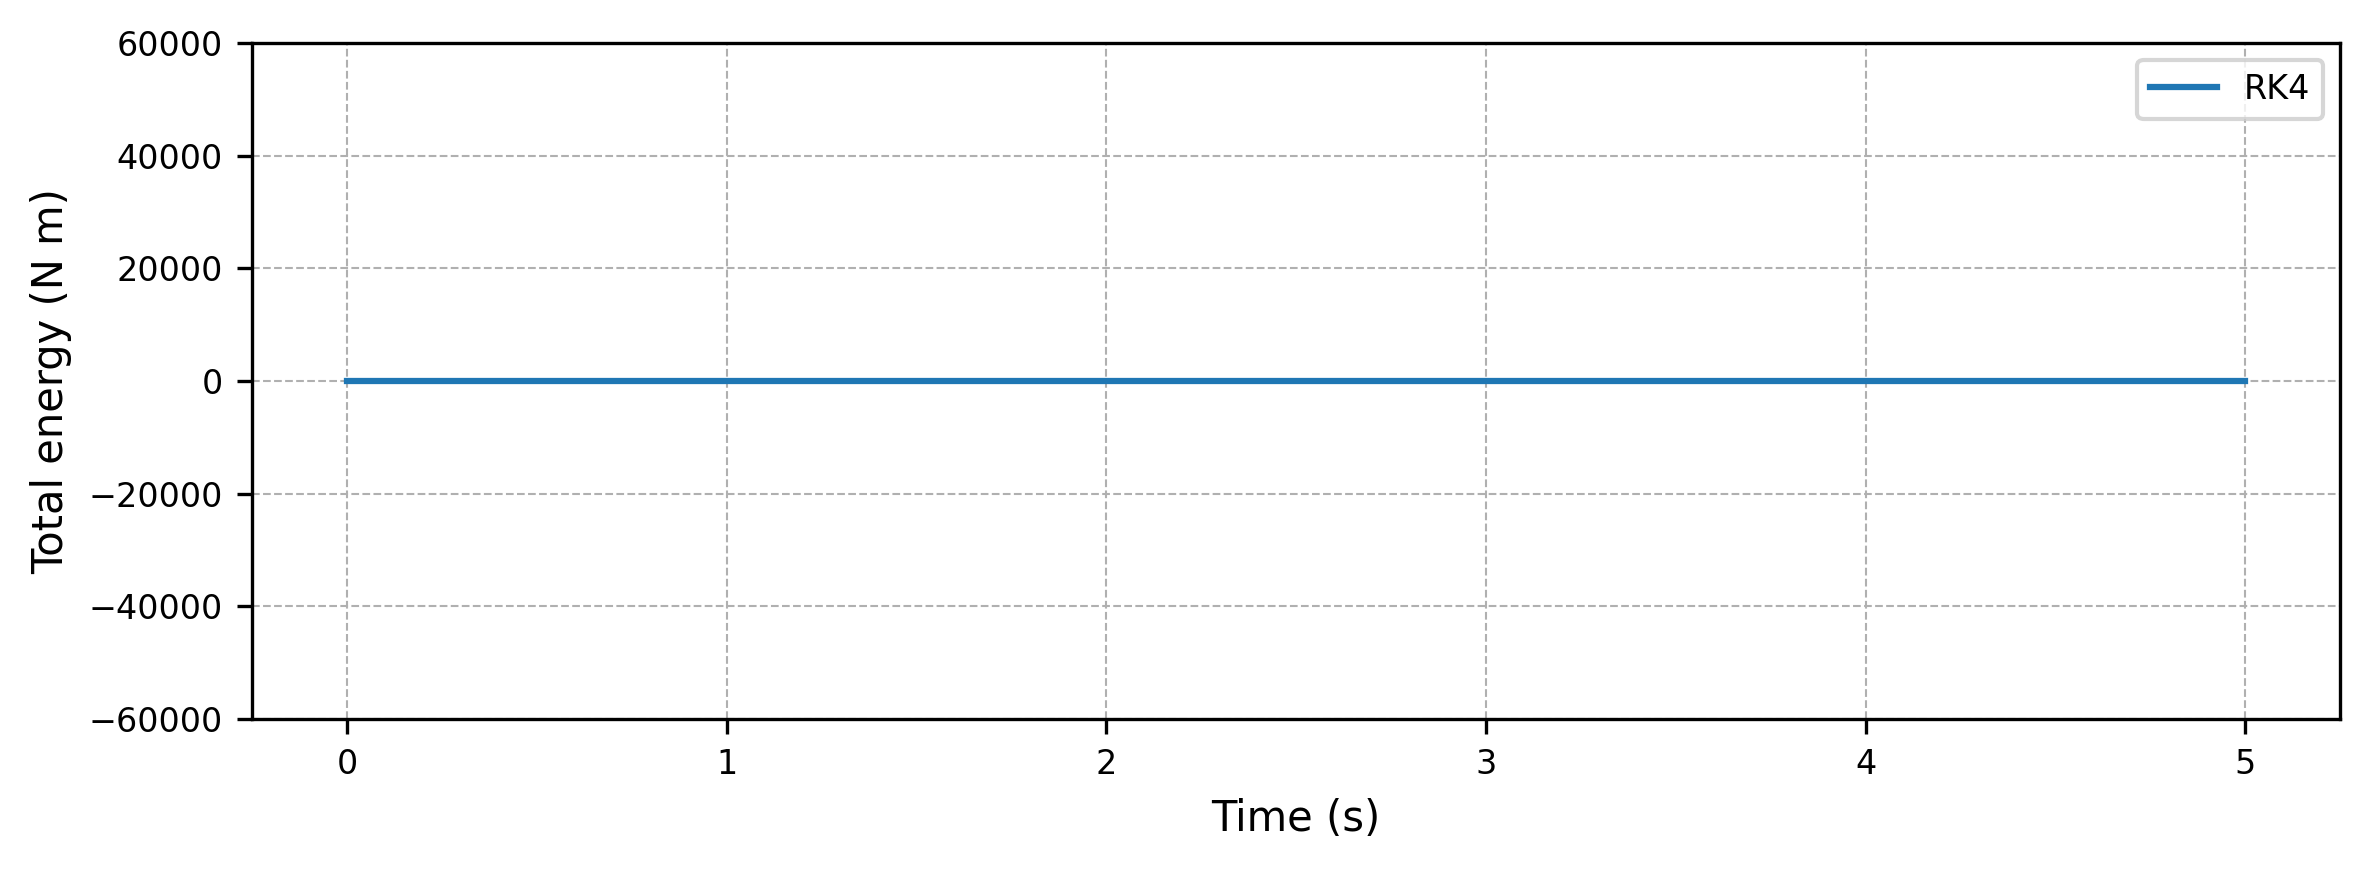

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(8 * 1, 3 * 1), dpi=Latex_DPI)

subfig = axs
# subfig.set_title('(a)')
plt.xlabel('Time (s)')
plt.ylabel('Total energy (N m)')
subfig.plot(data_t, energy_rk4, '-', label='RK4')
# subfig.plot(data_t01, energy_rk4_h01, '-', label='RK4, h=0.1')
# subfig.plot(data_t, energy_baseline, '-', label='NN')
# subfig.plot(data_t, energy_pinn, '-', label='PINN')
# subfig.plot(data_t, energy_deeponet, '-', label='Ours')
subfig.legend()

jie = 60000.2
plt.ylim((-jie, jie))
plt.tight_layout()
